In [34]:
# imports
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import numpy as np

In [41]:
#Load
data_path = "data/Mall_Customers.csv"
df = pd.read_csv(data_path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
print("Missing Values:")
print(df.isnull().sum())
print("\nData Info:")
df.info()

Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


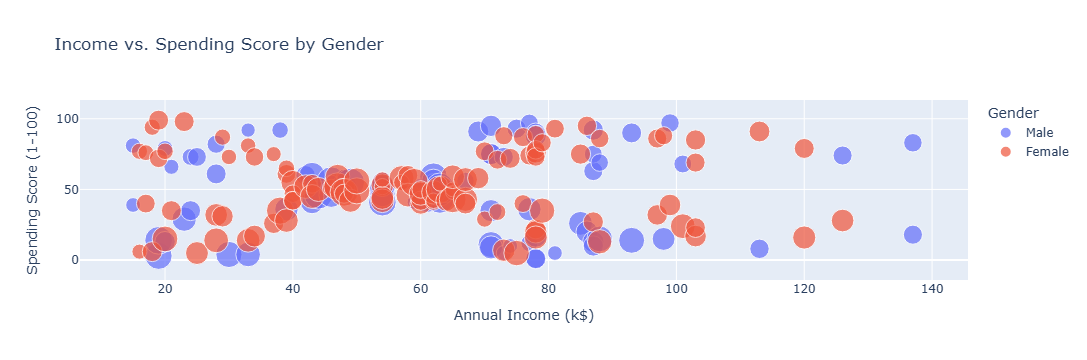

In [45]:
#scatter
fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", 
                 color="Gender", size="Age", hover_data=["CustomerID"],
                 title="Income vs. Spending Score by Gender")
fig.show()

C:\Users\moeal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\moeal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\moeal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\moeal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

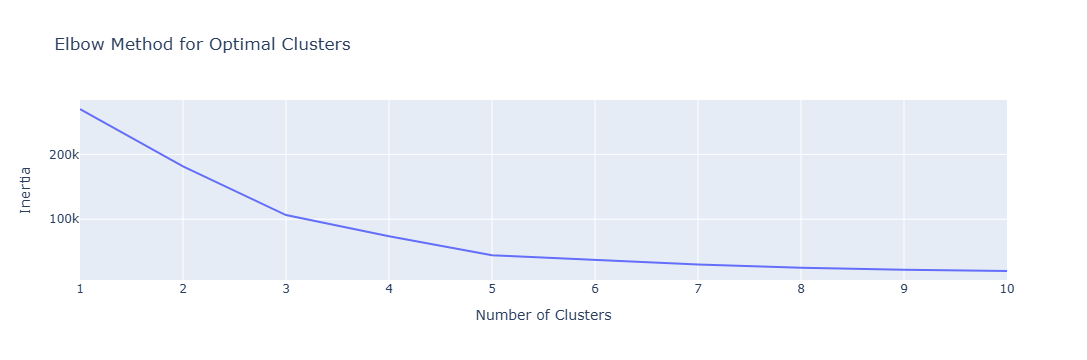

In [55]:
#kmeans cluster method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
fig = px.line(x=range(1, 11), y=inertia, title="Elbow Method for Optimal Clusters")
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Inertia")
fig.show()

C:\Users\moeal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



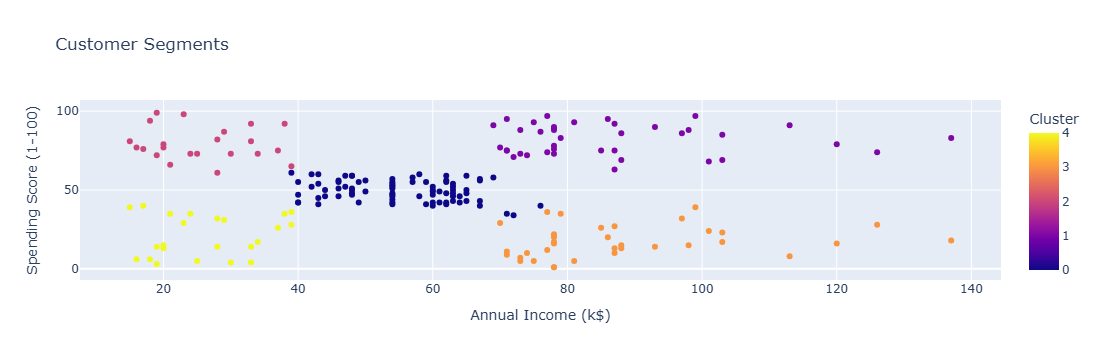

In [56]:
#kmeans  to categorize clusters
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", 
                 color="Cluster", hover_data=["Age", "Gender"],
                 title="Customer Segments")
fig.show()

In [57]:
#inv filters 
gender_filter = "Female"  
age_range = (20, 40)      
filtered_df = df[df["Gender"] == gender_filter]
filtered_df = filtered_df[(filtered_df["Age"] >= age_range[0]) & 
                         (filtered_df["Age"] <= age_range[1])]

C:\Users\moeal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



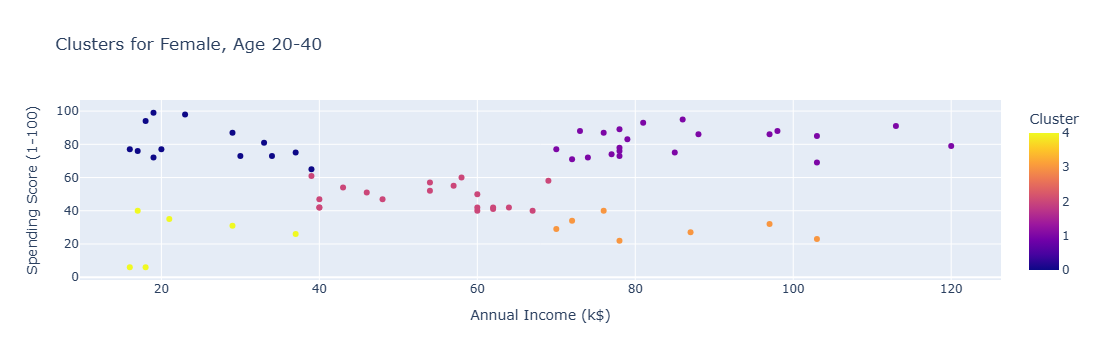

In [59]:
#groups filter for visual
X_filtered = filtered_df[["Annual Income (k$)", "Spending Score (1-100)"]].values
if len(X_filtered) > 0:
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    filtered_df["Cluster"] = kmeans.fit_predict(X_filtered)
    fig = px.scatter(filtered_df, x="Annual Income (k$)", y="Spending Score (1-100)", 
                     color="Cluster", hover_data=["Age", "Gender"],
                     title=f"Clusters for {gender_filter}, Age {age_range[0]}-{age_range[1]}")
    fig.show()
else:
    print("No data matches the filters.")